In [1]:
#imports for the ML
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import datetime

In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
#Importing csvs in place of sql database

#2020
Anx_2020_df = pd.read_csv("Resources/mental_2020_Anxiety_df.csv")

Dep_2020_df = pd.read_csv("Resources/mental_2020_Depression_df.csv")

Either_2020_df = pd.read_csv("Resources/mental_2020_AnxOrDPRS_df.csv")

#2021
Anx_2021_df = pd.read_csv("Resources/mental_2021_Anxiety_df.csv")

Dep_2021_df = pd.read_csv("Resources/mental_2021_Depression_df.csv")

Either_2021_df = pd.read_csv("Resources/mental_2021_AnxOrDPRS_df.csv")

#All years
Either_All_df = pd.read_csv("Resources/mental_AnxOrDPRS_df.csv")

Dep_All_df = pd.read_csv("Resources/mental_Depression_df.csv")

Anx_All_df = pd.read_csv("Resources/mental_2021_Anxiety_df.csv")

In [4]:
le = LabelEncoder()
Anx_2020_df.head()

,Group,Subgroup,Time_Period,Value,Risk
0,By Age,18 - 29 years,2020-04-23,40.2,Extreme
1,By Age,30 - 39 years,2020-04-23,34.4,Moderate
2,By Age,40 - 49 years,2020-04-23,34.1,Moderate
3,By Age,50 - 59 years,2020-04-23,31.0,Moderate
4,By Age,60 - 69 years,2020-04-23,24.9,Mild


In [5]:
def table_func(df):
    
    le = LabelEncoder()
    del df['Value']
    df['Time_Period'] = le.fit_transform(df['Time_Period'])
    

In [6]:
#Changing Time period so it is ML ready, remove "Value"

#2020
table_func(Anx_2020_df)

table_func(Dep_2020_df)

table_func(Either_2020_df)

#2021
table_func(Anx_2021_df)

table_func(Dep_2021_df)

table_func(Either_2021_df)

#All years
table_func(Anx_All_df)

table_func(Dep_All_df)

table_func(Either_All_df)

Anx_2020_df.head()

,Group,Subgroup,Time_Period,Risk
0,By Age,18 - 29 years,0,Extreme
1,By Age,30 - 39 years,0,Moderate
2,By Age,40 - 49 years,0,Moderate
3,By Age,50 - 59 years,0,Moderate
4,By Age,60 - 69 years,0,Mild


In [7]:
#Create dummy columns

#2020
Anx_2020_df = pd.get_dummies(Anx_2020_df, columns=["Group","Subgroup"])

Dep_2020_df = pd.get_dummies(Dep_2020_df, columns=["Group","Subgroup"])

Either_2020_df = pd.get_dummies(Either_2020_df, columns=["Group","Subgroup"])

#2021
Anx_2021_df = pd.get_dummies(Anx_2021_df, columns=["Group","Subgroup"])

Dep_2021_df = pd.get_dummies(Dep_2021_df, columns=["Group","Subgroup"])

Either_2021_df = pd.get_dummies(Either_2021_df, columns=["Group","Subgroup"])

#All Years
Anx_All_df = pd.get_dummies(Anx_All_df, columns=["Group","Subgroup"])

Dep_All_df = pd.get_dummies(Dep_All_df, columns=["Group","Subgroup"])

Either_All_df = pd.get_dummies(Either_All_df, columns=["Group","Subgroup"])

Anx_2020_df.head()

,Time_Period,Risk,Group_By Age,Group_By Education,Group_By Race/Hispanic ethnicity,Group_By Sex,Group_By State,Subgroup_18 - 29 years,Subgroup_30 - 39 years,Subgroup_40 - 49 years,...,Subgroup_South Dakota,Subgroup_Tennessee,Subgroup_Texas,Subgroup_Utah,Subgroup_Vermont,Subgroup_Virginia,Subgroup_Washington,Subgroup_West Virginia,Subgroup_Wisconsin,Subgroup_Wyoming
0,0,Extreme,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Moderate,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Moderate,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,Moderate,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Mild,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Split into x and y

y = Anx_2020_df["Risk"]
X = Anx_2020_df.drop(columns =["Risk"])


In [9]:
X.describe()

,Time_Period,Group_By Age,Group_By Education,Group_By Race/Hispanic ethnicity,Group_By Sex,Group_By State,Subgroup_18 - 29 years,Subgroup_30 - 39 years,Subgroup_40 - 49 years,Subgroup_50 - 59 years,...,Subgroup_South Dakota,Subgroup_Tennessee,Subgroup_Texas,Subgroup_Utah,Subgroup_Vermont,Subgroup_Virginia,Subgroup_Washington,Subgroup_West Virginia,Subgroup_Wisconsin,Subgroup_Wyoming
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,...,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000
mean,10.000000,0.101449,0.057971,0.072464,0.028986,0.739130,0.014493,0.014493,0.014493,0.014493,...,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493
std,6.057391,0.302027,0.233769,0.259344,0.167824,0.439261,0.119552,0.119552,0.119552,0.119552,...,0.119552,0.119552,0.119552,0.119552,0.119552,0.119552,0.119552,0.119552,0.119552,0.119552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
y.value_counts()

Moderate    541
Mild        490
High        316
Extreme     102
Name: Risk, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=64)
Counter(y_train)

Counter({'Moderate': 419, 'Extreme': 71, 'Mild': 363, 'High': 233})

In [12]:
# Resample the training data with the BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=64)
rf_model = rf_model.fit(X_train, y_train)

In [13]:
# Calculated the balanced accuracy score
pred = rf_model.predict(X_test)
balanced_accuracy_score(y_test, pred)

0.6074385902475143

In [14]:
# Display the confusion matrix
confusion_matrix(y_test, pred)

array([[16, 14,  0,  1],
       [ 7, 47,  5, 24],
       [ 0,  3, 92, 32],
       [ 0, 18, 28, 76]], dtype=int64)

In [15]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, pred))

                   pre       rec       spe        f1       geo       iba       sup

    Extreme       0.70      0.52      0.98      0.59      0.71      0.48        31
       High       0.57      0.57      0.88      0.57      0.70      0.48        83
       Mild       0.74      0.72      0.86      0.73      0.79      0.61       127
   Moderate       0.57      0.62      0.76      0.60      0.69      0.47       122

avg / total       0.64      0.64      0.84      0.64      0.73      0.52       363



In [16]:
# List the features sorted in descending order by feature importance
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.43668396978931673, 'Time_Period'),
 (0.013878375484774668, 'Subgroup_18 - 29 years'),
 (0.013477387607700647, 'Subgroup_80 years and above'),
 (0.012795042825766115,
  'Subgroup_Non-Hispanic, other races and multiple races'),
 (0.011807955979534511, 'Subgroup_70 - 79 years'),
 (0.011233764034492466, 'Subgroup_Less than a high school diploma'),
 (0.011194065117073364, 'Subgroup_North Dakota'),
 (0.011176364606837103, 'Subgroup_60 - 69 years'),
 (0.010527620794849271, 'Subgroup_Minnesota'),
 (0.010510045932956763, 'Subgroup_New Mexico'),
 (0.010127221719768507, 'Subgroup_Louisiana'),
 (0.00982438423198164, 'Subgroup_Iowa'),
 (0.009781392910632325, 'Subgroup_Non-Hispanic Asian, single race'),
 (0.0096270738420538, 'Subgroup_Nevada'),
 (0.009509385092873307, 'Subgroup_South Dakota'),
 (0.009347879274594387, 'Subgroup_California'),
 (0.00901503284590087, 'Subgroup_Nebraska'),
 (0.008997661680290847, 'Group_By State'),
 (0.008702836638869501, 'Subgroup_Hispanic or Latino'),
 (0.008702685

In [17]:
#Split into x and y for 2021 prediction

y_2021 = Anx_2021_df["Risk"]
X_2021 = Anx_2021_df.drop(columns =["Risk"])

In [18]:
# Calculated the balanced accuracy score
pred = rf_model.predict(X_2021)
balanced_accuracy_score(y_2021, pred)

0.3168896621396964

In [19]:
# Display the confusion matrix
confusion_matrix(y_2021, pred)

array([[ 10,  12,   3,   6],
       [ 18,  28,  43,  51],
       [ 21, 147, 324, 347],
       [ 25,  63, 105, 108]], dtype=int64)

In [20]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_2021, pred))

                   pre       rec       spe        f1       geo       iba       sup

    Extreme       0.14      0.32      0.95      0.19      0.55      0.29        31
       High       0.11      0.20      0.81      0.14      0.40      0.15       140
       Mild       0.68      0.39      0.68      0.49      0.51      0.25       839
   Moderate       0.21      0.36      0.60      0.27      0.46      0.21       301

avg / total       0.50      0.36      0.68      0.40      0.49      0.23      1311



In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_2021, y_2021, random_state=64)
Counter(y_train)

Counter({'Mild': 625, 'Moderate': 230, 'High': 104, 'Extreme': 24})

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=64)
rf_model = rf_model.fit(X_train, y_train)

In [23]:
pred = rf_model.predict(X_test)
balanced_accuracy_score(y_test, pred)

0.6066007937552627

In [24]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, pred))

                   pre       rec       spe        f1       geo       iba       sup

    Extreme       0.50      0.43      0.99      0.46      0.65      0.40         7
       High       0.53      0.53      0.94      0.53      0.71      0.48        36
       Mild       0.88      0.88      0.78      0.88      0.83      0.69       214
   Moderate       0.58      0.59      0.88      0.58      0.72      0.51        71

avg / total       0.77      0.77      0.82      0.77      0.79      0.62       328



In [25]:
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.5234651873219903, 'Time_Period'),
 (0.025159633366111114, 'Subgroup_18 - 29 years'),
 (0.02456810194357232,
  'Subgroup_Non-Hispanic, other races and multiple races'),
 (0.02408729353659311, 'Subgroup_30 - 39 years'),
 (0.01331212031193984, 'Subgroup_Louisiana'),
 (0.012305737429259517, 'Subgroup_Less than a high school diploma'),
 (0.01176481302816206, 'Subgroup_Hispanic or Latino'),
 (0.011706992649373894, 'Subgroup_Nevada'),
 (0.011293090750064525, 'Subgroup_Oklahoma'),
 (0.01095909252481687, 'Subgroup_Oregon'),
 (0.009987612117391832, 'Subgroup_West Virginia'),
 (0.009844221598336702, 'Subgroup_Kentucky'),
 (0.00920329509894612, 'Subgroup_Female'),
 (0.008423830624824496, "Subgroup_Some college/Associate's degree"),
 (0.00820003660400136, 'Subgroup_40 - 49 years'),
 (0.008064105149452674, 'Subgroup_Montana'),
 (0.007927100592328859, 'Group_By State'),
 (0.007688832418879379, 'Subgroup_Mississippi'),
 (0.007545111044694427, 'Subgroup_Tennessee'),
 (0.007470402584108058, 'Subgrou

In [26]:
y = Either_All_df["Risk"]
X = Either_All_df.drop(columns =["Risk"])

In [27]:
X.describe()

,Time_Period,Group_By Age,Group_By Education,Group_By Race/Hispanic ethnicity,Group_By Sex,Group_By State,Subgroup_18 - 29 years,Subgroup_30 - 39 years,Subgroup_40 - 49 years,Subgroup_50 - 59 years,...,Subgroup_South Dakota,Subgroup_Tennessee,Subgroup_Texas,Subgroup_Utah,Subgroup_Vermont,Subgroup_Virginia,Subgroup_Washington,Subgroup_West Virginia,Subgroup_Wisconsin,Subgroup_Wyoming
count,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,...,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000
mean,19.500000,0.101449,0.057971,0.072464,0.028986,0.739130,0.014493,0.014493,0.014493,0.014493,...,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493
std,11.545488,0.301977,0.233731,0.259301,0.167796,0.439188,0.119532,0.119532,0.119532,0.119532,...,0.119532,0.119532,0.119532,0.119532,0.119532,0.119532,0.119532,0.119532,0.119532,0.119532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
y.value_counts()

Moderate    806
High        782
Extreme     587
Mild        585
Name: Risk, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=64)
Counter(y_train)

Counter({'High': 588, 'Mild': 442, 'Moderate': 594, 'Extreme': 446})

In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=64)
rf_model = rf_model.fit(X_train, y_train)

In [31]:
pred = rf_model.predict(X_test)
balanced_accuracy_score(y_test, pred)

0.6137612388473737

In [32]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, pred))

                   pre       rec       spe        f1       geo       iba       sup

    Extreme       0.70      0.73      0.92      0.72      0.82      0.66       141
       High       0.54      0.55      0.82      0.54      0.67      0.44       194
       Mild       0.61      0.69      0.89      0.65      0.78      0.60       143
   Moderate       0.55      0.49      0.82      0.52      0.63      0.39       212

avg / total       0.59      0.60      0.86      0.59      0.71      0.50       690



In [33]:
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.5228239276459299, 'Time_Period'),
 (0.015010419852597642, 'Subgroup_80 years and above'),
 (0.012966518613329673, 'Subgroup_18 - 29 years'),
 (0.011805756505852628,
  'Subgroup_Non-Hispanic, other races and multiple races'),
 (0.011760070646419088, 'Subgroup_70 - 79 years'),
 (0.00914547306293922, 'Group_By Age'),
 (0.009098286197992623, 'Subgroup_South Dakota'),
 (0.008927319670933954, 'Subgroup_Wisconsin'),
 (0.008641758009523652, 'Subgroup_North Dakota'),
 (0.008460939997332984, 'Subgroup_Nevada'),
 (0.008294938238183199, 'Subgroup_Louisiana'),
 (0.00795979803662196, 'Subgroup_Less than a high school diploma'),
 (0.007867810548066205, 'Subgroup_Minnesota'),
 (0.007687706851796555, 'Subgroup_30 - 39 years'),
 (0.007460751904433614, 'Subgroup_Hispanic or Latino'),
 (0.0074283605245155735, 'Subgroup_Oregon'),
 (0.00742604129540868, 'Subgroup_Hawaii'),
 (0.007291480155765548, 'Subgroup_Montana'),
 (0.007272647873102583, 'Subgroup_Iowa'),
 (0.007215143757408499, 'Subgroup_60 - 69 yea

In [34]:
new_input = np.array(X.iloc[2000]).reshape(1,-1)
new_input

array([[28,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1]], dtype=int32)

In [35]:
new_output = rf_model.predict(new_input)

In [36]:
ml_input = pd.DataFrame(columns = X.columns)

In [37]:
ml_input


,Time_Period,Group_By Age,Group_By Education,Group_By Race/Hispanic ethnicity,Group_By Sex,Group_By State,Subgroup_18 - 29 years,Subgroup_30 - 39 years,Subgroup_40 - 49 years,Subgroup_50 - 59 years,...,Subgroup_South Dakota,Subgroup_Tennessee,Subgroup_Texas,Subgroup_Utah,Subgroup_Vermont,Subgroup_Virginia,Subgroup_Washington,Subgroup_West Virginia,Subgroup_Wisconsin,Subgroup_Wyoming


In [38]:
ml_input = ml_input.append(pd.Series(0, index=ml_input.columns), ignore_index=True)

#Creating empty csv to possibly run predictions on user data

ml_input.to_csv("Resources/ml_input.csv", index=False)

ml_input

,Time_Period,Group_By Age,Group_By Education,Group_By Race/Hispanic ethnicity,Group_By Sex,Group_By State,Subgroup_18 - 29 years,Subgroup_30 - 39 years,Subgroup_40 - 49 years,Subgroup_50 - 59 years,...,Subgroup_South Dakota,Subgroup_Tennessee,Subgroup_Texas,Subgroup_Utah,Subgroup_Vermont,Subgroup_Virginia,Subgroup_Washington,Subgroup_West Virginia,Subgroup_Wisconsin,Subgroup_Wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Predict user input function

def mlprediction(mlinput):
    y = Either_All_df["Risk"]
    X = Either_All_df.drop(columns =["Risk"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=64)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=64)
    rf_model = rf_model.fit(X_train, y_train)
    user_output = rf_model.predict(mlinput)
    return user_output

In [40]:
mlpred = mlprediction(ml_input)

In [41]:
predictions = mlpred[0]

In [42]:
predictions

'Moderate'

In [43]:
new_output

array(['Mild'], dtype=object)

In [44]:
prediction = new_output[0]

In [45]:
prediction

'Mild'

In [46]:
importances

array([0.52282393, 0.00914547, 0.00447936, 0.00434341, 0.00268206,
       0.00615671, 0.01296652, 0.00768771, 0.00648629, 0.00423653,
       0.00721514, 0.01176007, 0.01501042, 0.00530798, 0.00591192,
       0.00530286, 0.00639779, 0.0070646 , 0.00671911, 0.00481779,
       0.00633653, 0.00641738, 0.00496986, 0.00497988, 0.00558679,
       0.00624778, 0.00742604, 0.00401079, 0.00746075, 0.00571165,
       0.00639352, 0.0044221 , 0.00727265, 0.00537655, 0.00673692,
       0.0079598 , 0.00829494, 0.0057844 , 0.00580059, 0.00579065,
       0.00541203, 0.00511739, 0.00786781, 0.00670246, 0.00555146,
       0.00729148, 0.00617822, 0.00846094, 0.00651987, 0.00463604,
       0.0066684 , 0.00531897, 0.00669425, 0.00595151, 0.00405823,
       0.01180576, 0.00514515, 0.00864176, 0.00475007, 0.00639323,
       0.00742836, 0.00461293, 0.00528313, 0.00412578, 0.00585838,
       0.00909829, 0.00569969, 0.00614304, 0.0053954 , 0.00569265,
       0.00580255, 0.00561985, 0.00617687, 0.00892732, 0.00547

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [48]:
lst = rf_model.feature_importances_
lst2 = X.columns
graph_df = pd.DataFrame(list(zip(lst, lst2)))
df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)))
df2 = graph_df
#df2 = graph_df.max(10)
df2.columns = ["value", "type"]
df2 = df2.nlargest(10, 'value')
df2 = df2.set_index('type')
df2

#Top 10 factors

,value
type,
Time_Period,0.522824
Subgroup_80 years and above,0.015010
Subgroup_18 - 29 years,0.012967
"Subgroup_Non-Hispanic, other races and multiple races",0.011806
Subgroup_70 - 79 years,0.011760
Group_By Age,0.009145
Subgroup_South Dakota,0.009098
Subgroup_Wisconsin,0.008927
Subgroup_North Dakota,0.008642


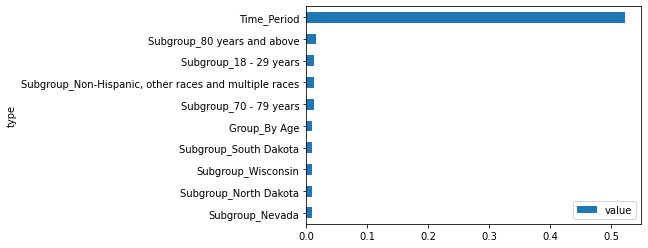

In [49]:
df2.plot(kind = "barh").invert_yaxis()
